# upload file

In [ ]:
from google.colab import files
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from math import floor

In [ ]:
uploaded = files.upload()

Saving carbon_emission.csv to carbon_emission.csv


# pre-processing

In [ ]:
df = pd.read_csv("carbon_emission.csv", encoding="utf-8")

In [ ]:
df_original = df.copy()

In [ ]:
df[['Sex','Transport','Vehicle Type','CarbonEmission']]

,Sex,Transport,Vehicle Type,CarbonEmission
0,female,public,NaN,2238
1,female,walk/bicycle,NaN,1892
2,male,private,petrol,2595
3,male,walk/bicycle,NaN,1074
4,female,private,diesel,4743
...,...,...,...,...
9995,male,private,hybrid,2408
9996,female,private,lpg,3084
9997,female,walk/bicycle,NaN,2377
9998,male,private,petrol,4574


In [ ]:
df.isnull().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [ ]:
df['Vehicle Type'].value_counts()

lpg         697
electric    671
petrol      647
hybrid      642
diesel      622
Name: Vehicle Type, dtype: int64

In [ ]:
df['Vehicle Type'].unique()

array([nan, 'petrol', 'diesel', 'hybrid', 'lpg', 'electric'], dtype=object)

In [ ]:
df.groupby(['Vehicle Type'])['CarbonEmission'].mean().sort_values(ascending=True)

Vehicle Type
electric    1883.293592
hybrid      2708.500000
diesel      3230.204180
lpg         3352.063128
petrol      3749.887172
Name: CarbonEmission, dtype: float64

In [ ]:
def return_mean_CI(df_col, confidence=0.95):
  a = 1.0 * np.array(df_col)
  n = len(a)
  m, se = np.mean(a), scipy.stats.sem(a)
  h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
  return m-h, m+h

df_vt_electric = return_mean_CI(df.loc[df['Vehicle Type']=='electric', 'CarbonEmission'])
df_vt_hybrid = return_mean_CI(df.loc[df['Vehicle Type']=='hybrid', 'CarbonEmission'])
df_vt_diesel = return_mean_CI(df.loc[df['Vehicle Type']=='diesel', 'CarbonEmission'])
df_vt_lpg = return_mean_CI(df.loc[df['Vehicle Type']=='lpg', 'CarbonEmission'])
df_vt_petrol = return_mean_CI(df.loc[df['Vehicle Type']=='petrol', 'CarbonEmission'])

In [ ]:
print(df_vt_electric)
print(df_vt_hybrid)
print(df_vt_diesel)
print(df_vt_lpg)
print(df_vt_petrol)

(1832.9462883472627, 1933.640894961232)
(2641.7905059743557, 2775.2094940256443)
(3148.6834087132493, 3311.724951415368)
(3266.0311983605566, 3438.095057019644)
(3650.5252227728633, 3849.249120349239)


In [ ]:
df.loc[(df['Vehicle Type'].isnull()) & (df['CarbonEmission']<=1934), 'Vehicle Type'] = 'electric'
df.loc[(df['Vehicle Type'].isnull()) & ((df['CarbonEmission']>1934) & (df['CarbonEmission']<=2775)), 'Vehicle Type'] = 'hybrid'
df.loc[(df['Vehicle Type'].isnull()) & ((df['CarbonEmission']>2775) & (df['CarbonEmission']<=3312)), 'Vehicle Type'] = 'diesel'
df.loc[(df['Vehicle Type'].isnull()) & ((df['CarbonEmission']>3312) & (df['CarbonEmission']<=3438)), 'Vehicle Type'] = 'lpg'
df.loc[(df['Vehicle Type'].isnull()) & (df['CarbonEmission']>3438), 'Vehicle Type'] = 'petrol'

In [ ]:
df.isnull().sum()

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64

In [ ]:
df[['Sex','Transport','Vehicle Type','CarbonEmission']]

,Sex,Transport,Vehicle Type,CarbonEmission
0,female,public,hybrid,2238
1,female,walk/bicycle,electric,1892
2,male,private,petrol,2595
3,male,walk/bicycle,electric,1074
4,female,private,diesel,4743
...,...,...,...,...
9995,male,private,hybrid,2408
9996,female,private,lpg,3084
9997,female,walk/bicycle,hybrid,2377
9998,male,private,petrol,4574


In [ ]:
df['Vehicle Type'].value_counts()

electric    4353
hybrid      2903
diesel      1206
petrol       788
lpg          750
Name: Vehicle Type, dtype: int64

In [ ]:
df.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

In [ ]:
col_dummy = []
for col in df.columns:
  if df[col].dtypes == 'O':
    col_dummy.append(col)

col_dummy

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Frequency of Traveling by Air',
 'Waste Bag Size',
 'Energy efficiency',
 'Recycling',
 'Cooking_With']

In [ ]:
def create_one_hot_encoding(df, columns):
  dummies = pd.get_dummies(df[columns])
  df.drop(columns, axis=1, inplace=True)
  df = pd.concat([df, dummies], axis=1)
  return df

df = create_one_hot_encoding(df, col_dummy)
df

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,Body Type_overweight,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
0,230,210,4,7,26,1,2238,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,114,9,3,9,38,5,1892,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,138,2472,1,14,47,6,2595,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,157,74,3,20,5,7,1074,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,266,8457,1,3,5,6,4743,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,230,268,5,12,27,9,2408,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,234,5316,3,14,8,24,3084,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9997,298,96,5,11,5,24,2377,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,179,8688,5,19,14,5,4574,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_org = create_one_hot_encoding(df_original, col_dummy)
df_org

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,Body Type_overweight,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
0,230,210,4,7,26,1,2238,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,114,9,3,9,38,5,1892,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,138,2472,1,14,47,6,2595,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,157,74,3,20,5,7,1074,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,266,8457,1,3,5,6,4743,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,230,268,5,12,27,9,2408,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,234,5316,3,14,8,24,3084,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9997,298,96,5,11,5,24,2377,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,179,8688,5,19,14,5,4574,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
def return_high_corr(df, col):
  df_corr = df.corr()
  df_corr = pd.DataFrame(df_corr[col].drop(col, axis=0))
  df_corr = df_corr.sort_values(col, ascending=False)
  return df_corr[(df_corr[col]>0.1) | (df_corr[col]<-0.1)]

high_corr = return_high_corr(df, 'CarbonEmission')
high_corr

,CarbonEmission
Vehicle Monthly Distance Km,0.594171
Transport_private,0.488520
Frequency of Traveling by Air_very frequently,0.434243
Vehicle Type_petrol,0.425425
Vehicle Type_diesel,0.309838
Vehicle Type_lpg,0.303404
How Many New Clothes Monthly,0.198887
Body Type_obese,0.165703
Sex_male,0.163895
Waste Bag Weekly Count,0.159193


In [ ]:
# leave only high corr
col_high_corr = np.array(high_corr.index)
col_high_corr = np.append(col_high_corr, ['CarbonEmission'])
col_high_corr

df_high_corr = df[col_high_corr]
df_high_corr

,Vehicle Monthly Distance Km,Transport_private,Frequency of Traveling by Air_very frequently,Vehicle Type_petrol,Vehicle Type_diesel,Vehicle Type_lpg,How Many New Clothes Monthly,Body Type_obese,Sex_male,Waste Bag Weekly Count,...,Waste Bag Size_small,Heating Energy Source_electricity,Body Type_underweight,Sex_female,Frequency of Traveling by Air_rarely,Transport_public,Transport_walk/bicycle,Frequency of Traveling by Air_never,Vehicle Type_electric,CarbonEmission
0,210,0,0,0,0,0,26,0,0,4,...,0,0,0,1,0,1,0,0,0,2238
1,9,0,0,0,0,0,38,1,0,3,...,0,0,0,1,1,0,1,0,1,1892
2,2472,1,0,1,0,0,47,0,1,1,...,1,0,0,0,0,0,0,1,0,2595
3,74,0,0,0,0,0,5,0,1,3,...,0,0,0,0,1,0,1,0,1,1074
4,8457,1,1,0,1,0,5,1,0,1,...,0,0,0,1,0,0,0,0,0,4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,268,1,0,0,0,0,27,1,1,5,...,0,0,0,0,0,0,0,1,0,2408
9996,5316,1,0,0,0,1,8,0,0,3,...,0,0,0,1,0,0,0,0,0,3084
9997,96,0,1,0,0,0,5,0,0,5,...,0,1,0,1,0,0,1,0,0,2377
9998,8688,1,0,1,0,0,14,0,1,5,...,0,0,1,0,1,0,0,0,0,4574


# modelling

## data split/ score func

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow import keras

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('CarbonEmission', axis=1), df[['CarbonEmission']], train_size=0.7)

In [ ]:
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(df_org.drop('CarbonEmission', axis=1), df_org[['CarbonEmission']], train_size=0.7)

In [ ]:
x_train_high_corr, x_test_high_corr, y_train_high_corr, y_test_high_corr = train_test_split(df_high_corr.drop('CarbonEmission', axis=1), df_high_corr[['CarbonEmission']], train_size=0.7)

In [ ]:
def return_results(model, x_test, y_test):
  y_predicted = model.predict(x_test)
  y_actual = np.array(y_test['CarbonEmission'])

  r2 = r2_score(y_actual, y_predicted)
  print("r2:", r2)

  mae = mean_absolute_error(y_actual, y_predicted)
  print("mae:", mae)

  y_predicted = pd.DataFrame(y_predicted, columns=['predicted'])
  y_actual = pd.DataFrame(y_actual, columns=['actual'])
  y_results = pd.concat([y_predicted, y_actual], axis=1)

  return y_results

## linear regression

In [ ]:
lr = LinearRegression()
lr_folds = KFold(n_splits=5, shuffle=True, random_state=100)
lr_scores = cross_val_score(lr, x_train, y_train, scoring='r2', cv=lr_folds)

lr_model = lr.fit(x_train, y_train)
return_results(lr_model, x_test, y_test)

r2:  0.9064528416740135
rmse:  210.13228712972005


,predicted,actual
0,1804.876770,1983
1,1501.337219,1459
2,2531.858643,2463
3,3259.857971,2529
4,2251.945129,2253
...,...,...
2995,3569.298035,3239
2996,1766.249451,1689
2997,757.465881,1026
2998,3083.438049,2794


In [ ]:
lr_org = LinearRegression()
lr_folds_org = KFold(n_splits=5, shuffle=True, random_state=100)
lr_scores_org = cross_val_score(lr_org, x_train_org, y_train_org, scoring='r2', cv=lr_folds_org)

lr_model_org = lr_org.fit(x_train_org, y_train_org)
return_results(lr_model_org, x_test_org, y_test_org)

r2:  0.9296606757675802
rmse:  179.6654142634074


,predicted,actual
0,2375.997307,2213
1,3108.215088,3338
2,1838.589737,1979
3,2807.907608,1782
4,949.148270,1903
...,...,...
2995,2244.629715,2283
2996,2965.123245,3110
2997,3290.297676,3528
2998,2324.557800,2029


In [ ]:
lr_high_corr = LinearRegression()
lr_folds_high_corr = KFold(n_splits=5, shuffle=True, random_state=100)
lr_scores_high_corr = cross_val_score(lr_high_corr, x_train_high_corr, y_train_high_corr, scoring='r2', cv=lr_folds_high_corr)

lr_model_high_corr = lr_high_corr.fit(x_train_high_corr, y_train_high_corr)
return_results(lr_model_high_corr, x_test_high_corr, y_test_high_corr)

r2:  0.8792658949954569
rmse:  249.81061679386394


,predicted,actual
0,1967.941240,1304
1,3536.626741,3052
2,1024.311922,1376
3,1500.264047,1803
4,3758.090659,3413
...,...,...
2995,1315.696651,1672
2996,1384.127869,1356
2997,2991.124277,3366
2998,4027.040486,3633


## random forest regression

In [ ]:
rf = RandomForestRegressor()
rf_folds = KFold(n_splits=5, shuffle=True, random_state=100)
rf_scores = cross_val_score(rf, x_train, y_train, scoring='r2', cv=rf_folds)

rf_model = rf.fit(x_train, y_train)
return_results(rf_model, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

r2: 0.9269316862403159
mae: 205.60503999999995


,predicted,actual
0,4974.98,4437
1,1060.79,1488
2,5526.52,6067
3,2995.77,2837
4,1777.27,1767
...,...,...
2995,2540.83,2618
2996,4631.31,4156
2997,1962.02,1892
2998,5105.57,4922


In [ ]:
rf_org = RandomForestRegressor()
rf_folds_org = KFold(n_splits=5, shuffle=True, random_state=100)
rf_scores_org = cross_val_score(rf_org, x_train_org, y_train_org, scoring='r2', cv=rf_folds_org)

rf_model_org = rf_org.fit(x_train_org, y_train_org)
return_results(rf_model_org, x_test_org, y_test_org)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

r2:  0.9192660437441413
mae:  215.81677666666664


,predicted,actual
0,1808.07,1909
1,1640.07,1433
2,1128.81,738
3,1930.10,1712
4,1461.83,1637
...,...,...
2995,2684.79,3163
2996,1516.85,1366
2997,1339.93,1310
2998,2495.71,2517


In [ ]:
rf_high_corr = RandomForestRegressor()
rf_folds_high_corr = KFold(n_splits=5, shuffle=True, random_state=100)
rf_scores_high_corr = cross_val_score(rf_high_corr, x_train_high_corr, y_train_high_corr, scoring='r2', cv=rf_folds_high_corr)

rf_model_high_corr = rf_high_corr.fit(x_train_high_corr, y_train_high_corr)
return_results(rf_model_high_corr, x_test_high_corr, y_test_high_corr)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

r2:  0.9264978002213573
mae:  203.92716666666666


,predicted,actual
0,2335.88,2428
1,1614.78,1623
2,2994.32,3141
3,1299.05,1179
4,3033.74,3198
...,...,...
2995,1605.43,1472
2996,4183.78,4367
2997,3105.23,2991
2998,1904.64,1895


## xgboost regression

In [ ]:
xg = XGBRegressor()
xg_folds = KFold(n_splits=5, shuffle=True, random_state=100)
xg_scores = cross_val_score(
    xg
    , x_train.to_numpy()
    , y_train.to_numpy()
    , scoring='r2'
    , cv=xg_folds)
xg_model = xg.fit(x_train.to_numpy(), y_train.to_numpy())
return_results(xg_model, x_test, y_test)

r2: 0.9718276636835906
mae: 128.9113404744466


,predicted,actual
0,4396.563965,4437
1,1213.518921,1488
2,5983.269531,6067
3,2849.662354,2837
4,1825.614990,1767
...,...,...
2995,2472.467773,2618
2996,4731.579102,4156
2997,1690.111206,1892
2998,5363.307129,4922


In [ ]:
xg_org = XGBRegressor()
xg_folds_org = KFold(n_splits=5, shuffle=True, random_state=100)
xg_scores_org = cross_val_score(xg_org, x_train_org.to_numpy(), y_train_org.to_numpy(), scoring='r2', cv=xg_folds_org)

xg_model_org = xg_org.fit(x_train_org.to_numpy(), y_train_org.to_numpy())
return_results(xg_model_org, x_test_org, y_test_org)

r2:  0.9726728012955733
mae:  123.06982543945313


,predicted,actual
0,2016.618652,1909
1,1457.940552,1433
2,710.291931,738
3,1638.114258,1712
4,1620.062378,1637
...,...,...
2995,3004.232666,3163
2996,1424.344849,1366
2997,1269.256470,1310
2998,2371.782227,2517


In [ ]:
xg_high_corr = XGBRegressor()
xg_folds_high_corr = KFold(n_splits=5, shuffle=True, random_state=100)
xg_scores_high_corr = cross_val_score(xg_high_corr, x_train_high_corr.to_numpy(), y_train_high_corr.to_numpy(), scoring='r2', cv=xg_folds_high_corr)

xg_model_high_corr = xg_high_corr.fit(x_train_high_corr.to_numpy(), y_train_high_corr.to_numpy())
return_results(xg_model_high_corr, x_test_high_corr, y_test_high_corr)

r2:  0.9467963711768428
mae:  178.02831134033204


,predicted,actual
0,2369.777832,2428
1,1701.754639,1623
2,3023.620361,3141
3,1515.417480,1179
4,3053.234131,3198
...,...,...
2995,1560.827759,1472
2996,4219.646973,4367
2997,3242.937988,2991
2998,1733.872192,1895


## neural network

In [ ]:
def nn_model(x_train, y_train):
  model = keras.Sequential()
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(1, activation='linear'))
  model.compile(
      optimizer='adam'
      , loss='mean_absolute_error'
      , metrics=['mean_absolute_error'])
  model.fit(x_train, y_train, epochs=50)
  return model

In [ ]:
model = nn_model(x_train, y_train)
return_results(model, x_test, y_test)

Epoch 1/50
219/219 [==============================] - 2s 5ms/step - loss: 811.7988 - mean_absolute_error: 811.7988
Epoch 2/50
219/219 [==============================] - 1s 6ms/step - loss: 636.8785 - mean_absolute_error: 636.8785
Epoch 3/50
219/219 [==============================] - 2s 8ms/step - loss: 565.1207 - mean_absolute_error: 565.1207
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 458.6676 - mean_absolute_error: 458.6676
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 352.7697 - mean_absolute_error: 352.7697
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 308.0692 - mean_absolute_error: 308.0692
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 298.7277 - mean_absolute_error: 298.7277
Epoch 8/50
219/219 [==============================] - 1s 5ms/step - loss: 284.2054 - mean_absolute_error: 284.2054
Epoch 9/50
219/219 [==============================] - 1s 5ms/step - loss: 266.49

,predicted,actual
0,4687.828613,5425
1,1036.924316,1000
2,2179.200195,2090
3,3494.598633,4048
4,1388.302734,1386
...,...,...
2995,2277.647461,2198
2996,1650.048706,1628
2997,2514.123535,2525
2998,1614.691162,1556


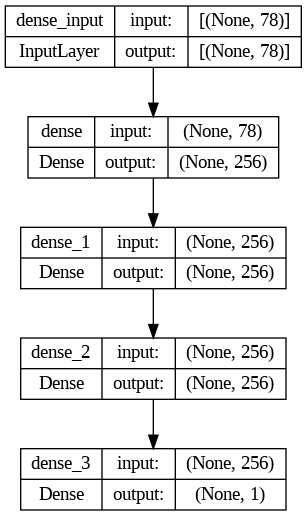

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model_org = nn_model(x_train_org, y_train_org)
return_results(model_org, x_test_org, y_test_org)

Epoch 1/50
219/219 [==============================] - 2s 3ms/step - loss: 825.0538 - mean_absolute_error: 825.0538
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 633.4323 - mean_absolute_error: 633.4323
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 563.9178 - mean_absolute_error: 563.9178
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 479.1630 - mean_absolute_error: 479.1630
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 377.3996 - mean_absolute_error: 377.3996
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 303.0516 - mean_absolute_error: 303.0516
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 280.3692 - mean_absolute_error: 280.3692
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 283.2917 - mean_absolute_error: 283.2917
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 262.73

,predicted,actual
0,2290.269043,2213
1,3222.761230,3338
2,1755.646973,1979
3,2609.687744,1782
4,1885.003906,1903
...,...,...
2995,2287.372070,2283
2996,3160.598633,3110
2997,3304.506104,3528
2998,2178.504395,2029


In [ ]:
model_high_corr = nn_model(x_train_high_corr, y_train_high_corr)
return_results(model_high_corr, x_test_high_corr, y_test_high_corr)

Epoch 1/50
219/219 [==============================] - 2s 3ms/step - loss: 990.5784 - mean_absolute_error: 990.5784
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 616.4504 - mean_absolute_error: 616.4504
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 493.8240 - mean_absolute_error: 493.8240
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 444.8173 - mean_absolute_error: 444.8173
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 380.5062 - mean_absolute_error: 380.5062
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 365.5751 - mean_absolute_error: 365.5751
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 356.7800 - mean_absolute_error: 356.7800
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 346.3876 - mean_absolute_error: 346.3876
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 338.85

,predicted,actual
0,2432.848145,1304
1,3847.053711,3052
2,1197.617920,1376
3,1620.967285,1803
4,3590.686279,3413
...,...,...
2995,1494.509888,1672
2996,1247.374756,1356
2997,3333.163330,3366
2998,4521.093262,3633
